# [EN] Import libraries
# [IT] Importo le varie librerie utilizzate

In [1]:
import pandas as pd
import pandasql # [EN] pandasql to query in SQL language - [IT] Utilizzo la libreria pandasql per analisi tramite linguaggio sql 
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
import matplotlib.pyplot as plt

# [EN] Import the two csv files (Oct and Nov) separately.
## Not considering the "product_id" and "category_id" columns in the analyzes below, they are excluded during loading.
## I also delete records with null values .
## Finally, I consider a subset of the October and November files.

## Note: The idea was to use Colab to leverage Google Cloud's resources. Not being able to manage this step due to timing, I opted for local management with the limits of record exclusion and blank elimination (incorrect; the initial idea was to delete only the records with blanks in fields that resulted not necessary for the various analyzes).

# [IT] Importo i due csv di Ottobre e Novembre separatamente
## Non considerando nel seguito le colonne "product_id" e "category_id", queste sono escluse in fase di caricamento.
## Elimino inoltre record che presentano valori nulli al proprio interno
## Considero infine un sottoinsieme dei file di Ottobre e Novembre

## Nota: l'idea era di usare Colab per sfruttare le risorse Google Cloud. Non essendo riuscito a gestire questo passaggio per le tempistiche, ho optato per una gestione in locale con i limiti dell'esclusione di record ed eliminazione dei blank (non corretta; l'idea iniziale era di eliminare solo i record privi delle informazioni che risultavano di volta in volta necessarie alle varie analisi).

In [2]:
chunksize =1000000  #67501979 --dropna: 42089564 
fields = ['event_time','event_type','category_code','brand','price','user_id','user_session']
TextFileReader = pd.read_csv('C:/Users/fevangel/OneDrive - Capgemini/Fabiano/Magistrale Data Science/ADM/HW2/2019-Nov.csv/2019-Nov.csv', chunksize=chunksize,usecols=fields,nrows=10000000)

df = pd.concat(TextFileReader, ignore_index=True)
df_drop_na = df.dropna()

In [3]:
chunksize =1000000 #42448764 --dropna:26560620
fields = ['event_time','event_type','category_code','brand','price','user_id','user_session']
TextFileReader_2 = pd.read_csv('C:/Users/fevangel/OneDrive - Capgemini/Fabiano/Magistrale Data Science/ADM/HW2/2019-Oct.csv/2019-Oct.csv', chunksize=chunksize,usecols=fields,nrows=3000000)

df_2 = pd.concat(TextFileReader_2, ignore_index=True)
df_2_drop_na = df_2.dropna()

# [EN] Merge the two CSVs in an unique dataframe
# [IT] Unisco i due csv in un unico dataframe

In [4]:
frames = [df_drop_na,df_2_drop_na]
result = pd.concat(frames, ignore_index=True)

# RQ1 What’s the operation users repeat more on average within a session? 
# [EN]
## Using the SQL language, through the pandasql library, I group by session and event_type and count the occurrences for the session-event_type pair.
## I then calculate the average of the occurrences of each event_type within a session, grouping by event_type and calculating the average itself
# [IT]
## Utilizzando il linguaggio SQL, tramite libreria pandasql, raggruppo per session ed event_type e conteggio le occorrenze per la coppia session-event_type.
## Calcolo quindi la media delle occorrenze di ogni event_type all'interno di una sessione, raggruppando per event_type e calcolando la media stessa

In [6]:
result_1 = result[['user_session','event_type']]

In [8]:
# RQ1 What’s the operation users repeat more on average within a session? Con SQL
result_sess_event = pysqldf("SELECT user_session,event_type, count(event_type) as occorrenze FROM result_1 group by user_session,event_type")
result_sess_event_2 = pysqldf("SELECT event_type, avg(occorrenze) as media_occorrenze from result_sess_event group by event_type order by 2 desc")
print(result_sess_event_2)
print("The operation users repeat more within a session is " +result_sess_event_2['event_type'][0]+", with this average: "+str(result_sess_event_2['media_occorrenze'][0]))  

  event_type  media_occorrenze
0       view          3.949162
1       cart          1.580714
2   purchase          1.168083
The operation users repeat more within a session is view, with this average: 3.9491618967972313


# RQ1 What’s the operation users repeat more on average within a session? 
# [EN]
## Alternative version: I consider a list containing the possible types of event and, using the for loop on this LIST, I check the number of occurrences per session and event_type. On these occurrences, I calculate the average for each event_type.
## Finally, I use a dictionary in which I insert, for each type of event, the average of the occurrences and extract the type of event with the highest average
# [IT]
## Versione alternativa: considero una lista contenente i possibili tipi di evento e, tramite ciclo for su tale Lista, vado a verificare il numero di occorrenze per sessione ed event_type. Su tali occorrenze calcolo la media per ciascun event_type.
## Utilizzo infine un dizionario nel quale inserisco,  per ciascun tipo di evento, la media delle occorrenze ed estraggo il tipo evento con la media più alta

In [10]:
# RQ1 What’s the operation users repeat more on average within a session?
lista_eventi = ['view','purchase','cart']
diz_eventi_media = {}
for j in lista_eventi:
    somma = 0
    conta = 0
    media = 0
    count_Operation = (result.loc[result_1['event_type'] == j].groupby(['user_session','event_type']).event_type.count())
    for i in count_Operation:
        somma += i
        conta += 1
    media = somma/conta
    diz_eventi_media[j] = media
    print("The event_type "+j+" is repeated on average "+str(media)+" per session")
maximum = max(diz_eventi_media, key=diz_eventi_media.get)  # Just use 'min' instead of 'max' for minimum.
print("The operation users repeat more within a session is " +maximum+", with this average:  "+str(diz_eventi_media[maximum]))    

The event_type view is repeated on average 3.9491618967972313 per session
The event_type purchase is repeated on average 1.1680826350286235 per session
The event_type cart is repeated on average 1.5807143473012588 per session
The operation users repeat more within a session is view, with this average:  3.9491618967972313


# RQ1 Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc)
# [EN]
## Based on the previously calculated fields, I plot on the x axis the event_type on and on the y axis the average of the occurrences of the relative event_type
# [IT]
## Sulla base di quanto calcolato nel punto precedente, riporto sull'asse x l'event_type e sull'asse y la media delle occorrenza del relativo event_type

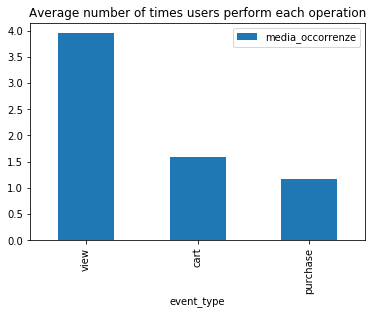

In [9]:
# RQ1 Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc)
result_sess_event_2.plot(x='event_type', y='media_occorrenze', kind='bar', title = 'Average number of times users perform each operation') 
plt.show()

# RQ1 How many times, on average, a user views a product before adding it to the cart?
# [EN]
## For each session and for each user, initially calculate the first event of 'cart' (calculating the first event_time for event_type = 'cart')
## On the basis of the first 'cart' event_time previously calculated, grouping by session and user, I consider all the 'views' present before adding to the cart.
## I then calculate the average with respect to the 'views' considered
# [IT]
## Per ogni sessione e per ogni utente, calcolo inizialmente il primo evento di 'cart' (calcolando il primo event_time per event_type = 'cart')
## Sulla base del primo event_time di 'cart' precedentemente calcolato, raggruppando per sessione ed utente, considero tutte le 'view' presenti prima dell'aggiunta al carrello.
## Calcolo quindi la media rispetto alle 'view' così considerate

In [13]:
result_1 = result[['user_session','event_type','user_id','event_time']]

In [14]:
# RQ1 How many times, on average, a user views a product before adding it to the cart?
result_many_times = pysqldf("SELECT user_session, user_id, min(event_time) first_cart FROM result_1 where event_type = 'cart' group by user_session,user_id")
result_many_times_2 = pysqldf("SELECT r.user_session, r.user_id, count(r.event_time) as conta from result_1 as r join result_many_times as r1 on (r.user_id = r1.user_id and r.user_session = r1.user_session) where r.event_type = 'view' and r.event_time < r1.first_cart group by r.user_session, r.user_id")
media = sum(result_many_times_2['conta'])/len(result_many_times_2['conta'])
print("On average, a user views a product "+str(media)+ " times before adding it to cart")

On average, a user views a product 2.9672449522073583 times before adding it to cart


# RQ1 What’s the probability that products added once to the cart are effectively bought?
# [EN]
## I initially group by user_session and user_id and, filtering on the event_type = 'cart', I calculate the time related to the first addition of the product to the cart and the count of 'carts' for each session and user (result in result_prob_buy).
## In the second step (result_prob_buy_2), again with respect to the user_session-user_id key, I calculate the total of 'purchase' events following the 'cart' event.
## In the last step (result_prob_buy_3) I calculate the probability that a product added to the cart will be purchased

# [IT]
## Raggruppo inizialmente per user_session ed user_id e, filtrando sull'event_type = 'cart', calcolo il tempo relativo alla prima aggiunta del prodotto al carrello e la count dei 'cart' per ogni sessione ed utente (risultato in result_prob_buy).
## Nel secondo step (result_prob_buy_2), sempre rispetto alla chiave user_session-user_id, calcolo il totale di eventi 'purchase' successivi all'evento di 'cart'.
## Nell'ultimo step (result_prob_buy_3) calcolo la probabilità che un prodotto aggiunto al carrello venga acquistato

In [11]:
result_1 = result[['user_session','event_type','user_id','event_time']]

In [12]:
# RQ1 What’s the probability that products added once to the cart are effectively bought? Da rivedere
result_prob_buy = pysqldf("SELECT user_session, user_id, min(event_time) first_cart, count(*) as conteggio_cart FROM result_1 where event_type = 'cart' group by user_session, user_id")
result_prob_buy_2 = pysqldf("SELECT r.user_session, r.user_id, min(conteggio_cart) as conteggio_cart, count(r.event_type) as conteggio_purchase from result_1 as r join result_prob_buy as r1 on (r.user_id = r1.user_id and r.user_session = r1.user_session) where r.event_type = 'purchase' and r.event_time > r1.first_cart group by r.user_session, r.user_id")
result_prob_buy_2['conteggio_cart'] = result_prob_buy_2['conteggio_cart'].astype(float)
result_prob_buy_2['conteggio_purchase'] = result_prob_buy_2['conteggio_purchase'].astype(float)
result_prob_buy_3 = pysqldf("SELECT SUM(conteggio_purchase)/SUM(conteggio_cart) as prob_buy from result_prob_buy_2")
print("the probability that a product added once to the cart is effectively bought is "+str(result_prob_buy_3['prob_buy']))

the probability that a product added once to the cart is effectively bought is 0    0.729784
Name: prob_buy, dtype: float64


# RQ1 How much time passes on average between the first view time and a purchase/addition to cart?
# [EN]
## Initially I calculate the event_time of the first addition to the cart for each session and each user (result_time_to_cart).
## So I'm going to see, for each session and each user, the moment of the first 'view' (result_time_to_cart_2).
## Show, for each session and user, the times of the first 'cart' and of the first 'view' (result_time_to_cart_3)
## I calculate the difference in seconds between the two dates for each session and each user
## I calculate the average over all the calculated differences
# [IT]
## Inizialmente calcolo l'event_time della prima aggiunta al carrello per ciascuna sessione e ciascun user (result_time_to_cart).
## Vado quindi a vedere, per ciascuna sessione e ciascun user, il momento della prima 'view' (result_time_to_cart_2).
## Riporto, per ciascuna sessione ed user, i tempi del primo 'cart' e della prima 'view' (result_time_to_cart_3)
## Calcolo la differenza in secondi tra le due date per ciascuna sessione e ciascun user
## Calcolo la media su tutte le differenze calcolate

In [15]:
result_1 = result[['user_session','event_type','user_id','event_time']]

In [16]:
# RQ1 How much time passes on average between the first view time and a purchase/addition to cart? Rivedere
result_time_to_cart = pysqldf("SELECT user_session,user_id, min(event_time) as first_cart FROM result_1 where event_type = 'cart' group by user_session,user_id")
result_time_to_cart_2 = pysqldf("SELECT r1.user_session, r1.user_id, min(r.event_time) as first_view from result_time_to_cart as r1 join result_1 as r on (r1.user_id = r.user_id and r1.user_session = r.user_session) where r.event_type = 'view' and r.event_time < r1.first_cart group by r1.user_session,r1.user_id")
result_time_to_cart_3 = pysqldf("SELECT r1.user_session,r1.user_id, r1.first_cart, r2.first_view from result_time_to_cart as r1 join result_time_to_cart_2 as r2 on (r1.user_id = r2.user_id and r1.user_session = r2.user_session)")
result_time_to_cart_3['first_cart'] =  pd.to_datetime(result_time_to_cart_3.first_cart)
result_time_to_cart_3['first_view'] =  pd.to_datetime(result_time_to_cart_3.first_view)
result_time_to_cart_3['differenza'] = (result_time_to_cart_3.first_cart - result_time_to_cart_3.first_view).dt.total_seconds()
media = sum(result_time_to_cart_3['differenza'])/len(result_time_to_cart_3['differenza'])
print("The avarage time between the first view time and the first addition to cart is "+str(media)+" sec")

The avarage time between the first view time and the first addition to cart is 254.15621304343108 sec


# RQ2 What are the categories of the most trending products overall?
# For each month visualize this information through a plot showing the number of sold products per category.
# [EN]
## I initially divide the category_code field into its sub-parts (identified as "category", "SubCategory", "LowCategory". When the "LowCategory" extracted is not valued (null), I identify the "SubCategory" as product; vice versa, if the "LowCategory" is valued, I identify it as product).
## I exclude cases with category = null and identify the product as the second or third value of the concatenation coming from the category_code (depending on whether the third value is set or not). By grouping by category and product thus obtained, I count the products sold (event_type = 'purchase').
## With result_categories_most_sold I see the categories associated with the best-selling products (in descending order).
## To view the number of products sold by category and by month, I initially extract the month from event_time. Then I group by category and, filtering on the month, I calculate the number of products sold for each category.
# [IT]
## Divido inizialmente il campo category_code nelle sue sottoparti (individuate come "category","SubCategory","LowCategory". Nei casi in cui la "LowCategory" non sia valorizzata, indivuo la "SubCategory" come product; viceversa, se la "LowCategory" risulta valorizzata, individuo questa come product).
## Escludo i casi con category a null e identifico il prodotto come secondo o terzo valore della concatenazione proveniente dal category_code (a seconda che il terzo valore sia valorizzato o meno). Raggruppando per category e product così ottenuto, conto i prodotti venduti (event_type = 'purchase').
## Con result_categories_most_sold vado a vedere le categorie associate ad i prodotti più venduti (in ordine decrescente).
## Per visualizzare il numero di prodotti venduti per category e per mese, estraggo inizialmente il mese rispetto all'event_time. Raggruppo quindi per  category e, filtrando sul mese, calcolo il numero dei prodotti venduti per ciascuna categoria.

        category     product  conteggio
0    electronics  smartphone      87941
1    electronics   headphone       8406
2    electronics          tv       5521
3    electronics      clocks       4379
4      computers    notebook       3775
..           ...         ...        ...
111      apparel        sock          3
112      apparel    trousers          3
113        sport   snowboard          3
114         auto       winch          2
115      apparel       scarf          1

[116 rows x 3 columns]


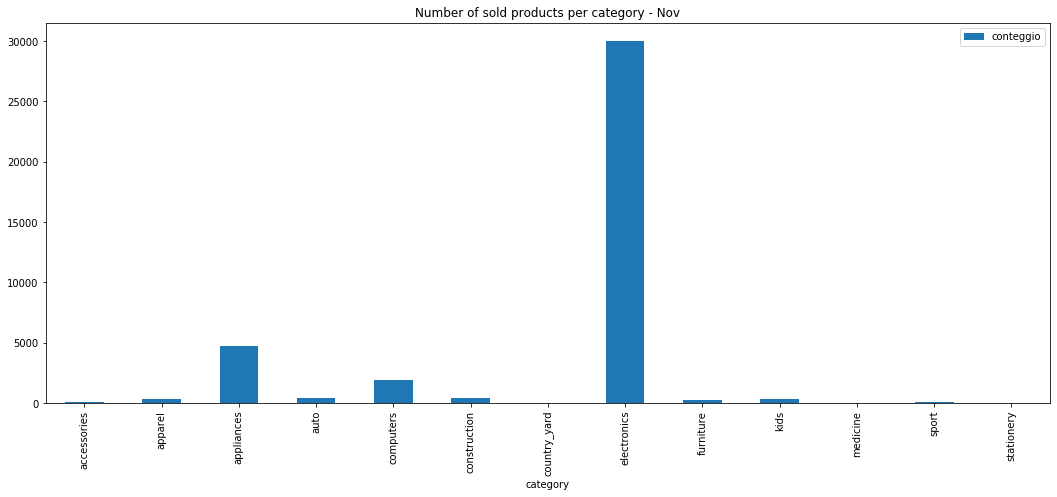

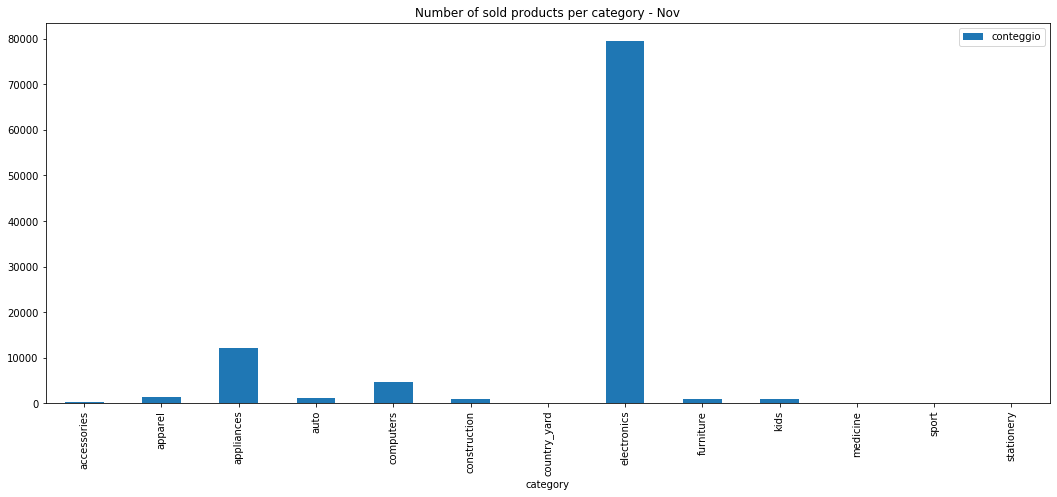

In [5]:
# RQ2 What are the categories of the most trending products overall? For each month visualize this information through a plot showing the number of sold products per category.
result_categories = result
cat = result_categories['category_code'].str.split(".",n= 1, expand = True)
result_categories['category'] = cat[0]
result_categories['SubCategory'] = cat[1]
cat_2 = result_categories['SubCategory'].str.split(".",n= 1, expand = True)
result_categories.drop(columns =["SubCategory"], inplace = True)
result_categories['SubCategory'] = cat_2[0]
result_categories['LowCategory'] = cat_2[1]
#escludo i category a null
result_categories_most_sold = pysqldf("SELECT category, CASE WHEN LowCategory is not null then LowCategory else SubCategory end as product,  count(*) conteggio from result_categories where event_type = 'purchase' and category is not null group by category_code, CASE WHEN LowCategory is not null then LowCategory else SubCategory end order by 3 DESC")
#Con il seguente print, possibile vedere le categorie associate ai prodotti, in ordine discendente rispetto ai prodotti venduti
print(result_categories_most_sold)
#estraggo il mese rispetto all'event_time
result_categories['event_time'] =  pd.to_datetime(result.event_time).dt.month
result_categories_most_sold_per_month_plot_oct = pysqldf("SELECT category,  count(*) conteggio from result_categories where event_type = 'purchase' and category is not null and event_time = 10 group by category")
result_categories_most_sold_per_month_plot_nov = pysqldf("SELECT category,  count(*) conteggio from result_categories where event_type = 'purchase' and category is not null and event_time = 11 group by category")
result_categories_most_sold_per_month_plot_oct.plot(x='category', y='conteggio', kind='bar',figsize=(18, 7), title = 'Number of sold products per category - Oct') 
result_categories_most_sold_per_month_plot_nov.plot(x='category', y='conteggio', kind='bar',figsize=(18, 7), title = 'Number of sold products per category - Nov') 
plt.show()

# RQ2 Plot the most visited subcategories
# [EN]
## I initially divide the category_code field into its sub-parts.
## In result_subCategories_plot I extract all the SubCategories related to the 'views' (only for the cases in which LowCategory is null (where LowCategory is the third value of the initial concatenation of the category_code). The interpretation here is that, in cases where the third value is present, the second value of the concatenation represents the SubCategory; vice versa, in cases where the third value of the concatenation is absent, the second directly represents the product).
# [IT]
## Divido inizialmente il campo category_code nelle sue sottoparti.
## In result_subCategories_plot estraggo tutte le SubCategory relative alle 'view' (per i soli casi in cui LowCategory is null (dove LowCategory è il terzo valore dell'inziale concatenazione del category_code). L'interpretazione qui è che, nei casi in cui il terzo valore è presente, il secondo valore della concatenazione rappresenta la SubCategory; viceversa, nelle casistiche in cui è assente il terzo valore della concatenazione, il secondo rappresenta direttamente il prodotto).

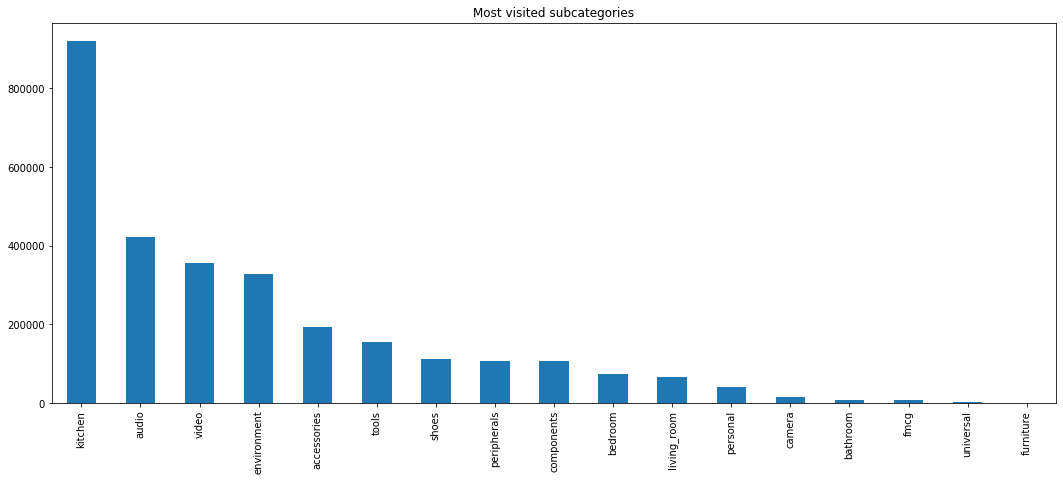

In [6]:
#RQ2 Plot the most visited subcategories 
result_subCategories = result
cat = result['category_code'].str.split(".",n= 1, expand = True)
result_subCategories['category'] = cat[0]
result_subCategories['SubCategory'] = cat[1]
cat_2 = result_subCategories['SubCategory'].str.split(".",n= 1, expand = True)
result_subCategories.drop(columns =["SubCategory"], inplace = True)
result_subCategories['SubCategory'] = cat_2[0]
result_subCategories['LowCategory'] = cat_2[1]
result_subCategories_plot = pysqldf("SELECT SubCategory from result_subCategories where event_type = 'view' and LowCategory is not null")
result_subCategories_plot['SubCategory'].value_counts().head(50).plot.bar(\
figsize = (18, 7), \
title='Most visited subcategories'xlabel='SubCategories',\
ylabel='Number of Appearances')

#  RQ2 What are the 10 most sold products per category?
# [EN]
## I initially divide the category_code field into its sub-parts.
## In result_products_most_sold, I exclude cases with category = null and identify the product as the second or third value of the concatenation coming from the category_code (depending on whether the third value is set or not). By grouping by category and product thus obtained, I count the products sold (event_type = 'purchase').
## I associate a counter (ordered according to the products sold for each category) to the values thus obtained, so as to filter on the first ten values for each category
# [IT]
## Divido inizialmente il campo category_code nelle sue sottoparti.
## In result_products_most_sold, escludo i casi con category a null e identifico il prodotto come secondo o terzo valore della concatenazione proveniente dal category_code (a seconda che il terzo valore sia valorizzato o meno). Raggruppando per category e product così ottenuto, conto i prodotti venduti (event_type = 'purchase').
## Associo un contatore (ordinato rispetto ai prodotti venduti per ciascuna categoria) ai valori così ottenuti, in modo tale da filtrare sui primi dieci valori per ciascuna categoria

In [7]:
#RQ2 What are the 10 most sold products per category?
result_products = result
cat = result_products['category_code'].str.split(".",n= 1, expand = True)
result_products['category'] = cat[0]
result_products['SubCategory'] = cat[1]
cat_2 = result_products['SubCategory'].str.split(".",n= 1, expand = True)
result_products.drop(columns =["SubCategory"], inplace = True)
result_products['SubCategory'] = cat_2[0]
result_products['LowCategory'] = cat_2[1]
#escludo i category a null
result_products_most_sold = pysqldf("SELECT category, CASE WHEN LowCategory is not null then LowCategory else SubCategory end as product,  count(*) conteggio from result_products where event_type = 'purchase' and category is not null group by category_code, CASE WHEN LowCategory is not null then LowCategory else SubCategory end order by category, 3 DESC")
result_products_most_sold['ordine'] = result_products_most_sold.sort_values(['conteggio'], ascending=False)\
             .groupby(['category'])\
             .cumcount() + 1
result_products_most_sold = pysqldf("SELECT category, product from result_products_most_sold where ordine <= 10")
print(result_products_most_sold)

       category    product
0   accessories        bag
1   accessories     wallet
2   accessories   umbrella
3       apparel      shoes
4       apparel       keds
..          ...        ...
77        sport    bicycle
78        sport    trainer
79        sport     tennis
80        sport  snowboard
81   stationery   cartrige

[82 rows x 2 columns]


# RQ3 For each category, what’s the brand whose prices are higher on average?
# Find, for each category, the brand with the highest average price. Return all the results in ascending order by price.
# [EN]
## I initially divide the category_code field into its sub-parts.
## I calculate the total price and the total count by category and brand.
## I calculate the average price per category and brand as the ratio between the total price and the total count for the category-brand pair.
## I associate a counter (ordered with respect to the price for each category) to the values thus obtained, in order to filter by the highest price for each category

# [IT]
## Divido inizialmente il campo category_code nelle sue sottoparti.
## Calcolo il prezzo totale ed il conteggio totale per category e brand.
## Calcolo il prezzo medio per category e brand come rapporto tra il prezzo totale ed il conteggio totale per la coppia category-brand.
## Associo un contatore (ordinato rispetto al prezzo per ciascuna categoria) ai valori così ottenuti, in modo tale da filtrare per il prezzo più alto per ciascuna categoria

In [12]:
#RQ3 For each category, what’s the brand whose prices are higher on average? Find, for each category, the brand with the highest average price. Return all the results in ascending order by price.
result_price = result[['category_code','brand','price']]
cat = result_price['category_code'].str.split(".",n= 1, expand = True)
result_price['category'] = cat[0]
result_price['SubCategory'] = cat[1]
cat_2 = result_price['SubCategory'].str.split(".",n= 1, expand = True)
result_price.drop(columns =["SubCategory"], inplace = True)
result_price['SubCategory'] = cat_2[0]
result_price['LowCategory'] = cat_2[1]
result_price = pysqldf("SELECT category, brand, sum(price) as price, count(*) as conteggio from result_price where category is not null group by category, brand")
result_price['conteggio'] = result_price['conteggio'].astype(float)
result_price = pysqldf("SELECT category, brand, price/conteggio as avg_price from result_price")
result_price['ordine'] = result_price.sort_values(['avg_price'], ascending=False)\
            .groupby(['category'])\
            .cumcount() + 1
result_higher_price = pysqldf("SELECT category, brand, avg_price from result_price where ordine =1 order by avg_price")
print(result_higher_price)

C:\Users\fevangel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\fevangel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\fevangel\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

        category       brand    avg_price
0       medicine       omron    50.938306
1     stationery       xerox    66.670000
2        apparel     weekend   484.508235
3   country_yard      viking   727.341344
4    accessories     weekend   748.360215
5           auto   schneider  1023.178214
6      computers       apple  1648.614823
7           kids  minimotors  1815.491111
8      furniture      senspa  1911.248750
9    electronics        rado  2065.243388
10    appliances   climadiff  2236.463158
11  construction       helix  2311.890000
12         sport   pinarello  2567.663134


# RQ3 Write a function that asks the user a category in input and returns a plot indicating the average price of the products sold by the brand.
# [EN]
## I request the Category in input.
## I divide the category_code field into its sub-parts.
## I calculate the sum of the price by grouping by brand and filtering on the category entered in the input

# [IT]
## Viene richiesta la Categoria in input
## Divido il campo category_code nelle sue sottoparti.
## Calcolo la somma del price raggruppando per brand e filtrando sulla category inserita in input

Enter a category: sport


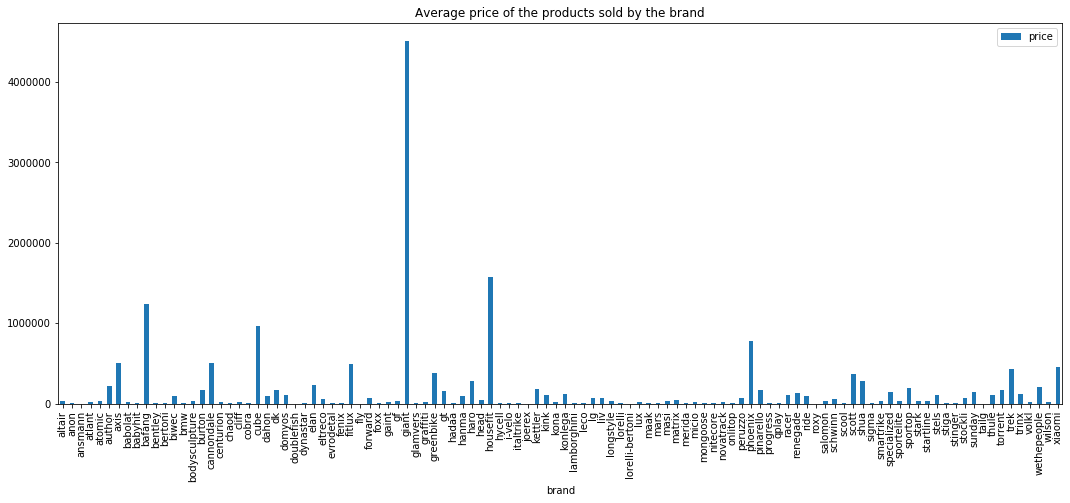

In [11]:
# Write a function that asks the user a category in input and returns a plot indicating the average price of the products sold by the brand
result_price = result[['category_code','brand','price']]
category_input = input("Enter a category: ")
result_price['category_input'] = category_input
cat = result_price['category_code'].str.split(".",n= 1, expand = True)
result_price['category'] = cat[0]
result_price['SubCategory'] = cat[1]
cat_2 = result_price['SubCategory'].str.split(".",n= 1, expand = True)
result_price.drop(columns =["SubCategory"], inplace = True)
result_price['SubCategory'] = cat_2[0]
result_price['LowCategory'] = cat_2[1]
result_price = pysqldf("SELECT brand, sum(price) price from result_price where category = category_input group by brand")
result_price.plot(x='brand', y='price', kind='bar',figsize=(18, 7), title = 'Average price of the products sold by the brand') 
plt.show()

# RQ4 How much does each brand earn per month?
# [EN]
## I initially extract the month from the event_type
## I calculate the total price by brand and month

# [IT]
## Estraggo inizialmente il mese dall'event_type
## Calcolo il price totale per brand e mese

In [13]:
# RQ4  How much does each brand earn per month? Write a function that given the name of a brand in input returns, for each month, its profit. Is the average price of products of different brands significantly different?
result_brand = result[['brand','event_time','price','event_type']]
result_brand['event_time'] =  pd.to_datetime(result_brand.event_time).dt.month
result_brand_profit = pysqldf("SELECT brand, event_time, sum(price) as price from result_brand where event_type = 'purchase' group by brand, event_time")
print(result_brand_profit)

C:\Users\fevangel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


      brand  event_time      price
0      acer          10  231139.88
1      acer          11  575513.82
2      acme          10       2.29
3      acme          11     158.26
4       acv          11     268.21
...     ...         ...        ...
1237   zoom          10     167.31
1238  zotac          11      76.16
1239    zte          10     386.00
1240    zte          11    1852.70
1241   zubr          11     926.66

[1242 rows x 3 columns]


# RQ4 Write a function that given the name of a brand in input returns, for each month, its profit. Is the average price of products of different brands significantly different?
# [EN]
## I request the brand in input.
## I extract the month from the event_type.
## I calculate the total price per month and the brand entered in input.
# [IT]
## Viene richiesto il brand in input
## Estraggo il mese dall'event_type
## Calcolo il price totale per mese ed il brand inserito in input

In [14]:
# Write a function that given the name of a brand in input returns, for each month, its profit. Is the average price of products of different brands significantly different?
result_brand = result[['brand','event_time','price','event_type']]
brand_input = input("Enter a brand: ")
result_brand['brand_input'] = brand_input
result_brand['event_time'] =  pd.to_datetime(result.event_time).dt.month
result_brand_profit = pysqldf("SELECT brand, event_time, sum(price) as price from result_brand where event_type = 'purchase' and brand = brand_input group by brand, event_time")
print(result_brand_profit)

Enter a brand: xiaomi


C:\Users\fevangel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\fevangel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


    brand  event_time      price
0  xiaomi           1  2141899.6


# RQ5 In what part of the day is your store most visited?
# [EN]
## I extract the month from the event_type
## I count the 'views' by grouping by the hours extracted previously
# [IT]
## Estraggo il mese dall'event_type
## Conto le 'view' raggruppando per le ore estratte in precedenza

In [14]:
# RQ5 In what part of the day is your store most visited?
result_hour = result[['event_time','event_type']]
result_hour['event_time_hour'] =  pd.to_datetime(result_hour.event_time).dt.hour
result_hour = pysqldf("SELECT event_time_hour, count(*) visits from result_hour where event_type = 'view' group by event_time_hour order by 2 desc")
print(result_hour)

C:\Users\fevangel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


    event_time_hour  visits
0                16  514302
1                17  507242
2                15  502943
3                14  475130
4                 6  424813
5                 7  424535
6                 9  422143
7                 8  421668
8                10  421014
9                13  420361
10                5  408380
11               11  407611
12                4  393763
13               18  388339
14               12  381439
15                3  314913
16               19  249050
17                2  210258
18               20  130729
19                1   94796
20               21   81751
21                0   51681
22               22   51108
23               23   37053


# RQ5 Create a plot that for each day of the week show the hourly average of visitors your store has
# [EN]
## I extract the dayofweek (0 = monday, .., 6 = sunday) from the event_time.
## Group by the dayofweek thus extracted and calculate the count (*) / 24 to have the average of the hourly views.
# [IT]
## Dall'event_time estraggo il dayofweek (0 = monday,..,6 = sunday).
## Raggruppo per il dayofweek così estratto e calcolo il count(*)/24 per avere la media delle visualizzazioni orarie.

C:\Users\fevangel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


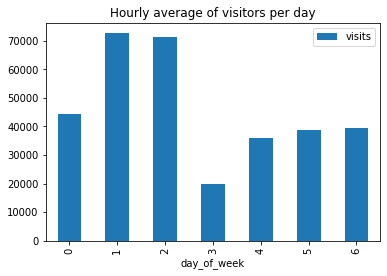

In [16]:
# Create a plot that for each day of the week show the hourly average of visitors your store has
result_day_of_week = result[['event_time','event_type']]
result_day_of_week['event_time'] =  pd.to_datetime(result_day_of_week.event_time).dt.dayofweek
#result_day_of_week['event_time_hour'] =  pd.to_datetime(result_day_of_week.event_time).dt.hour
result_day_of_week = pysqldf("SELECT event_time as day_of_week, count(*) as visits from result_day_of_week where event_type = 'view' group by event_time")
result_day_of_week['visits'] = result_day_of_week['visits'].astype(float)
result_day_of_week['visits'] = result_day_of_week['visits']/24
result_day_of_week.plot(x='day_of_week', y='visits', kind='bar',title = 'Hourly average of visitors per day') 
plt.show()

# RQ6 Find the overall conversion rate of your store
# [EN]
## I divide the category_code field into its sub-parts.
## In result_overall_1 I count purchase events with respect to products
## In result_overall_2 I count display events against products
## In result_overall_3 I calculate the conversion rate for each product
## Finally, I calculate the overall conversion rate
# [IT]
## Divido il campo category_code nelle sue sottoparti.
## In result_overall_1 conto gli eventi di acquisto rispetto ai prodotti
## In result_overall_2 conto gli eventi di visualizzazione rispetto ai prodotti
## In result_overall_3 calcolo il conversion rate per ciascun prodotto
## Calcolo infine il  conversion rate complessivo

In [17]:
# Find the overall conversion rate of your store
result_overall = result
cat = result_overall['category_code'].str.split(".",n= 1, expand = True)
result_overall['category'] = cat[0]
result_overall['SubCategory'] = cat[1]
cat_2 = result_overall['SubCategory'].str.split(".",n= 1, expand = True)
result_overall.drop(columns =["SubCategory"], inplace = True)
result_overall['SubCategory'] = cat_2[0]
result_overall['LowCategory'] = cat_2[1]
#escludo i category a null
result_overall_1 = pysqldf("SELECT CASE WHEN LowCategory is not null then LowCategory else SubCategory end as product,  count(*) conteggio_purchase from result_overall where event_type = 'purchase'  group by CASE WHEN LowCategory is not null then LowCategory else SubCategory end")
result_overall_2 = pysqldf("SELECT CASE WHEN LowCategory is not null then LowCategory else SubCategory end as product,  count(*) conteggio_view from result_overall where event_type = 'view'  group by CASE WHEN LowCategory is not null then LowCategory else SubCategory end")
result_overall_1['conteggio_purchase'] = result_overall_1['conteggio_purchase'].astype(float)
result_overall_2['conteggio_view'] = result_overall_2['conteggio_view'].astype(float)
result_overall_3 = pysqldf("SELECT r1.product, sum(r1.conteggio_purchase)/sum(r2.conteggio_view) as conversation_rate_per_product from result_overall_1 as r1 join result_overall_2 as r2 on (r1.product = r2.product) group by r1.product")
overall = sum(result_overall_3['conversation_rate_per_product'])/len(result_overall_3)
print("The conversation rate of the store is "+str(overall))

The conversation rate of the store is 0.00898900376219856


# RQ6 Plot the number of purchases of each category and show the conversion rate of each category in decreasing order